# MNIST

#### MNIST 손글씨 이미지를 다음이 방법으로 분류하고 test data를 이용하여 정확도를 비교하여라.

1. Softmax Regression
2. Supprot Vector Machine
3. Decision tree or Random forest

## 1. Softmax Regression

In [2]:
from keras.datasets import mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(X, y), (X_test0, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y)
y_test = to_categorical(y_test)

In [4]:
net = models.Sequential()
net.add(layers.Dense(10, activation= 'softmax', input_shape=(28*28,)))
net.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
# preprocessionmg
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test0.reshape((10000, 28*28))
X_test = X_test/255

In [6]:
net.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 672us/step - loss: 0.4699 - accuracy: 0.8771
Epoch 2/10
1875/1875 [==============================] - 1s 660us/step - loss: 0.3039 - accuracy: 0.9143
Epoch 3/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.2835 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 1s 665us/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/10
1875/1875 [==============================] - 1s 629us/step - loss: 0.2669 - accuracy: 0.9254
Epoch 6/10
1875/1875 [==============================] - 1s 673us/step - loss: 0.2622 - accuracy: 0.9267
Epoch 7/10
1875/1875 [==============================] - 1s 641us/step - loss: 0.2587 - accuracy: 0.9279
Epoch 8/10
1875/1875 [==============================] - 1s 639us/step - loss: 0.2556 - accuracy: 0.9292
Epoch 9/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2531 - accuracy: 0.9302
Epoch 10/10
1875/1875 [==============================] - 1s 674u

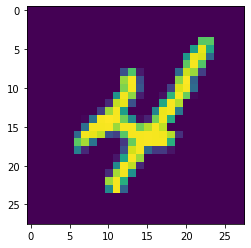

In [7]:
plt.imshow(X[9])

In [8]:
np.argmax(net.predict(X_train)[9])

4

In [9]:
net.predict(X_train)[9]

array([1.2976390e-06, 4.9334097e-09, 3.1368281e-06, 1.0604356e-07,
       9.9965477e-01, 2.7145185e-05, 2.8694951e-04, 6.3221336e-08,
       2.5713440e-05, 6.8771203e-07], dtype=float32)

In [10]:
net.evaluate(X_test, y_test)

313/313 [==============================] - 0s 580us/step - loss: 0.2636 - accuracy: 0.9271


[0.26359766721725464, 0.9271000027656555]

   ### Softmax Regression 정확도 약 0.93

--------------------------------------------------------------------------------------------

## 2. Supprot Vector Machine

In [48]:
(X, y), (X_test0, y_test) = mnist.load_data()
#y_train = y[:50000]
#y_test = y[50000:]

In [49]:
print(len(X))
print(len(X_train))
print(len(X_test))

print(len(y))
print(len(y_train))
print(len(y_test))

60000
60000
10000
60000
50000
10000


In [50]:
# preprocessionmg
X_train = X.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test0.reshape((10000, 28*28))
X_test = X_test/255

In [51]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from sklearn.svm import SVC

svm=SVC(kernel='rbf',gamma='auto')

svm.fit(X_train[:50000], y_train)
svm.score(X_test, y_test)

---------------------------------------------

### 3. Decision tree or Random forest

In [22]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100) # number of trees

In [26]:

clf.fit(X_train[:50000], y_train)
clf.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [0, 10000]